matrix norm is:  76.92272926118682


<Axes: xlabel='Rank', ylabel='Los'>

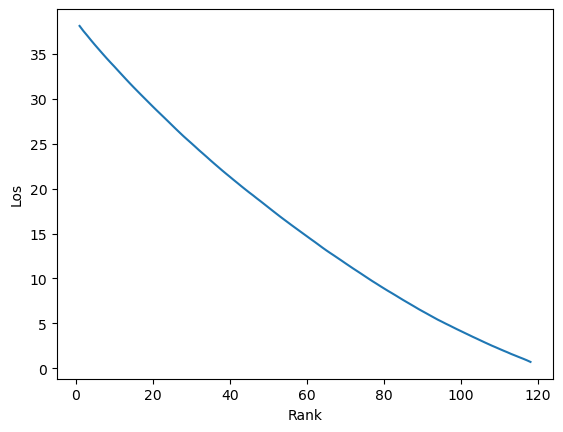

In [124]:
import numpy as np
import pandas as pd
import seaborn as sb

def matrixNorm(m):
    x,y = m.shape
    s = 0 
    for i in range(0, x - 1):
        for k in range(0, y - 1):
            el = m[i,k]
            s = s + el * el
        
    return np.sqrt(s)    
    pass

ex = np.random.random([150, 120])
u,s,vt = np.linalg.svd(ex, True, True)
m, n = u.shape

ex_norm = matrixNorm(ex)
print('matrix norm is: ', ex_norm)


df = pd.DataFrame(columns=['Rank', 'Los'])


for r in range(1, 119):
    s_new = s[:r]
    sigma = np.diag(s_new)
    u_new = u[:,:r]
    vt_new = vt[:r, :]
    m_new = u_new@sigma@vt_new
    diff = matrixNorm(m_new - ex)
    df.loc[r] = [r, diff]
    

sb.lineplot(df, x = "Rank", y = "Los")

#s_new = decreaseRangeTo(s, 110)